In [1]:
from grape import Graph, GraphVisualizer
from grape.embedders import TransEEnsmallen, TransETensorFlow, FirstOrderLINEEnsmallen, DeepWalkSkipGramEnsmallen

In [2]:
kg = Graph.from_csv(
    node_path="kg_biolink_nodes_3.4.3.tsv",
    nodes_column="node_name",
    node_list_node_types_column="node_type",
    node_types_separator="|",
    edge_path="kg_biolink_edges_3.4.3.tsv",
    sources_column="source",
    destinations_column="destination",
    edge_list_edge_types_column="edge_type",
    name="KGBioLink",
    directed=True
)

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


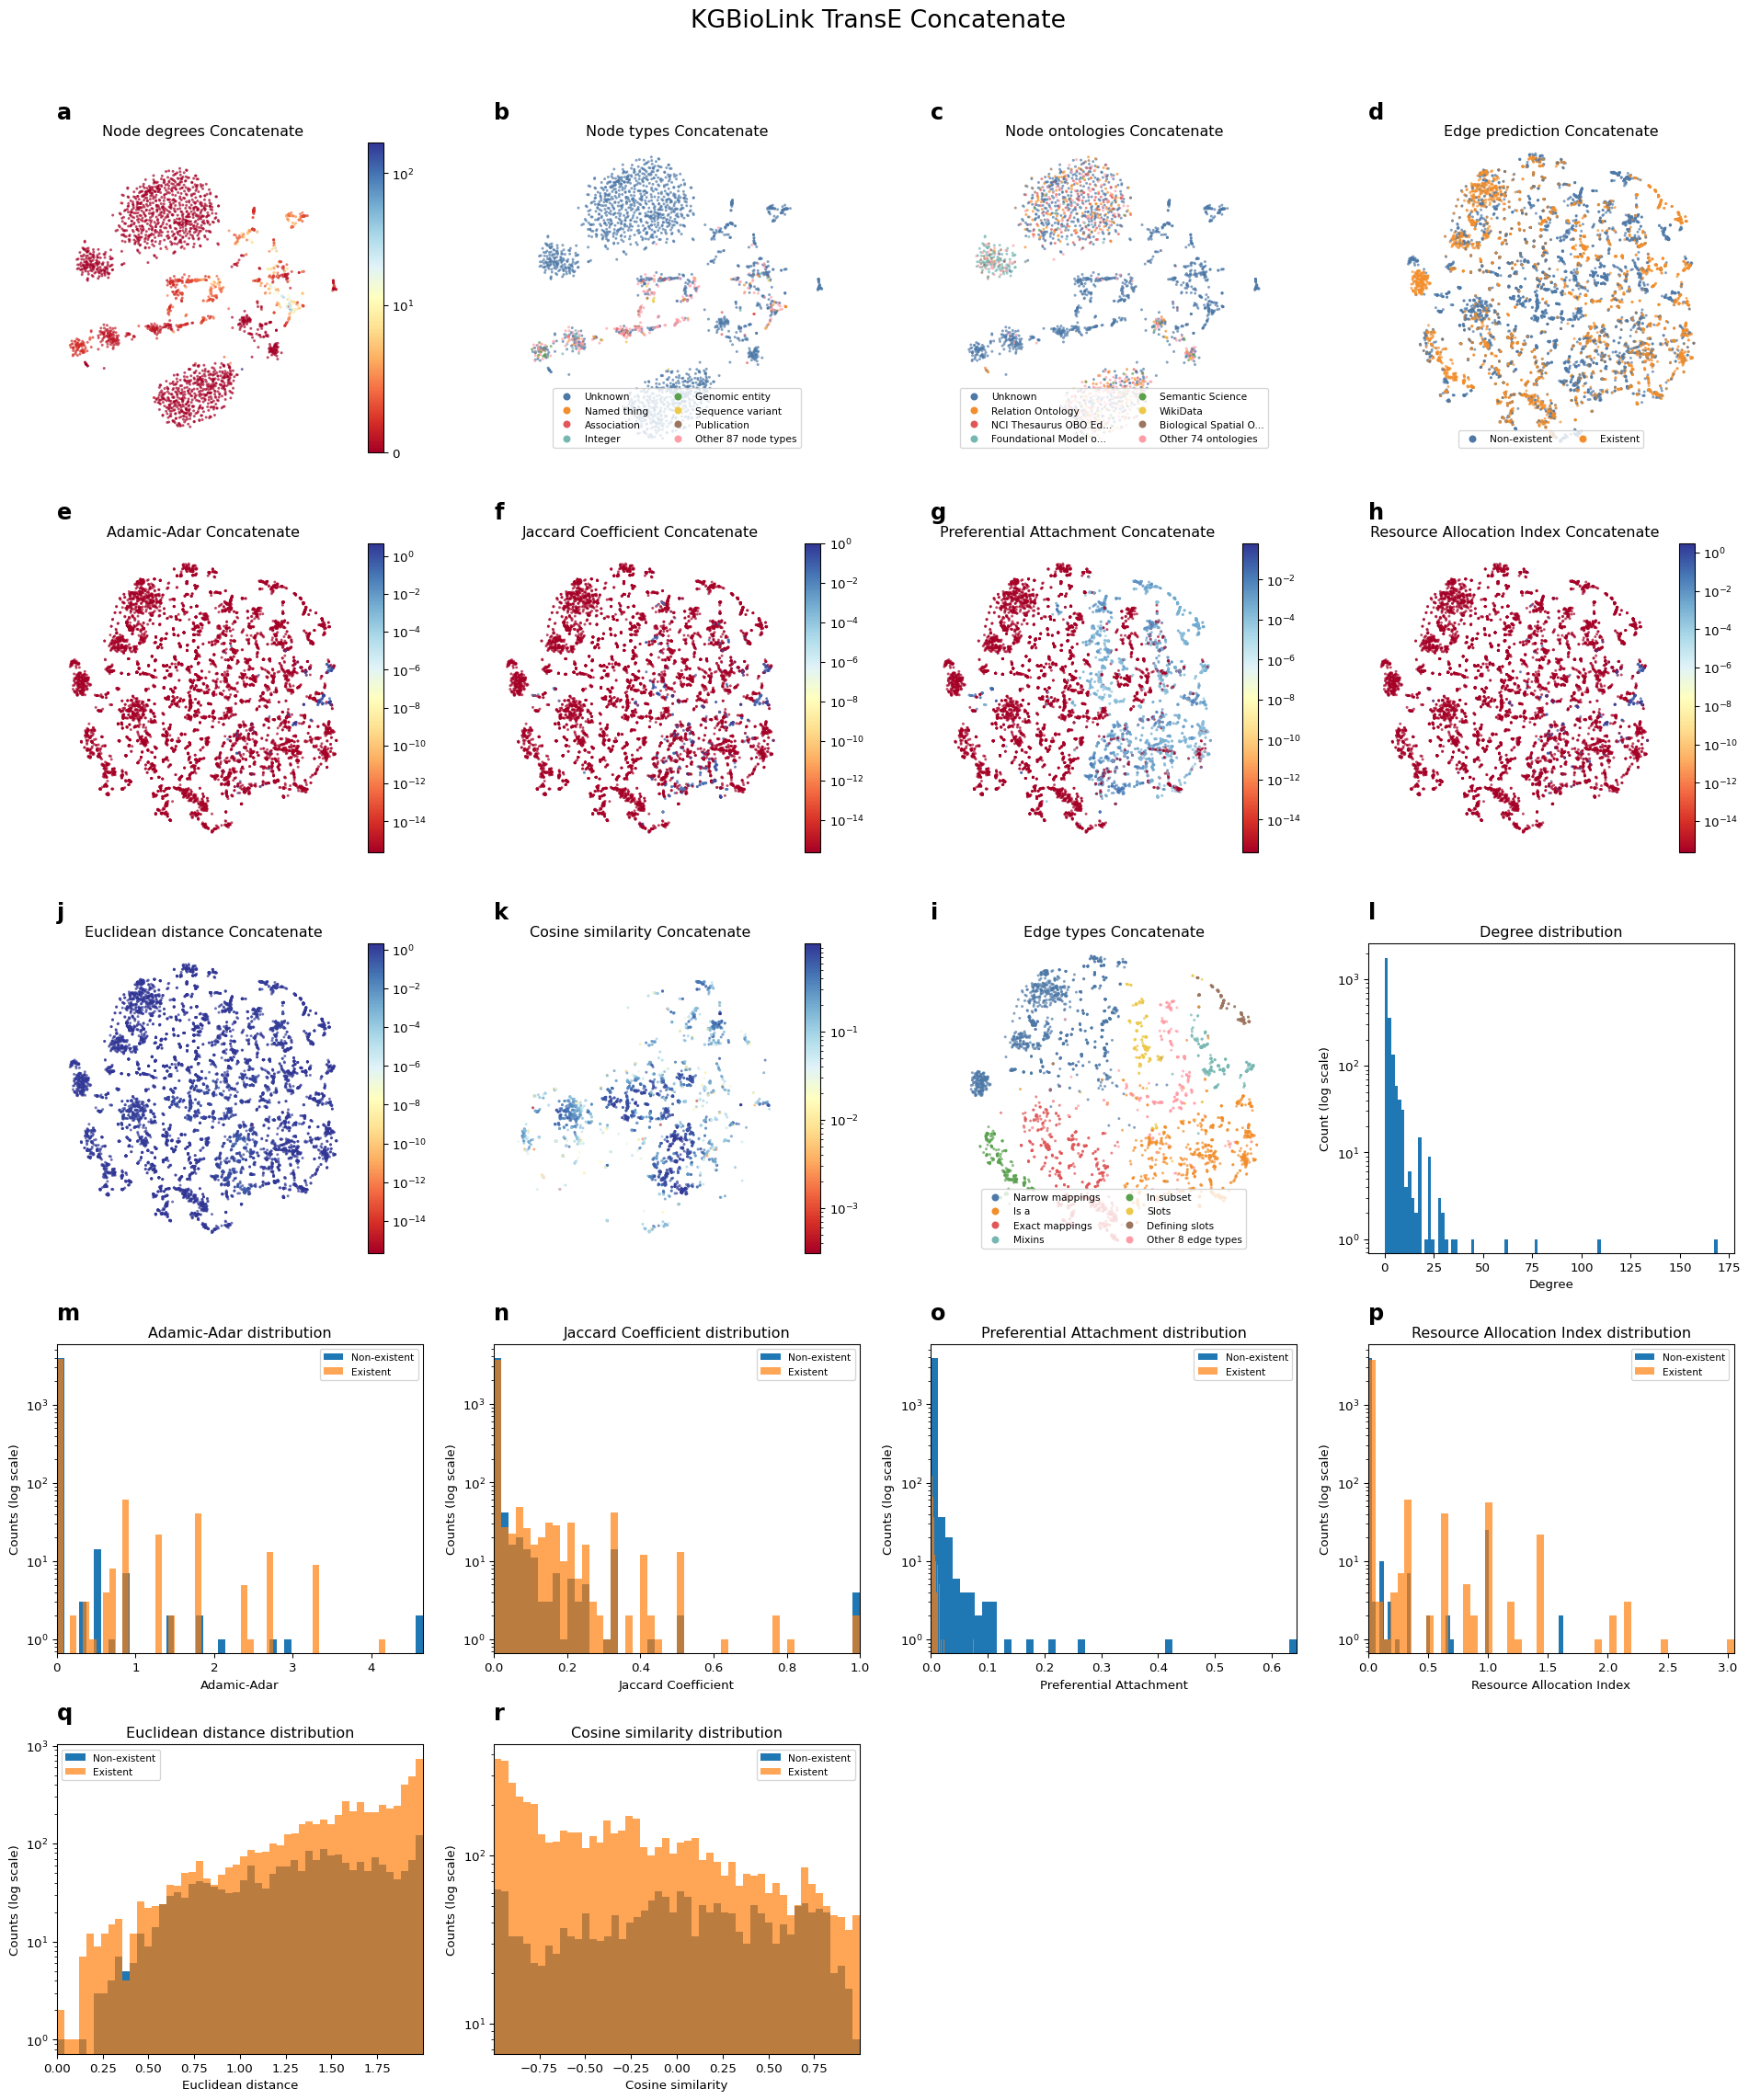

In [23]:
GraphVisualizer(kg).fit_and_plot_all(TransETensorFlow(
    embedding_size=200,
    epochs=2000,
))

In [ ]:
GraphVisualizer(kg).fit_and_plot_all(TransETensorFlow(
    embedding_size=200,
    epochs=2000,
))

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


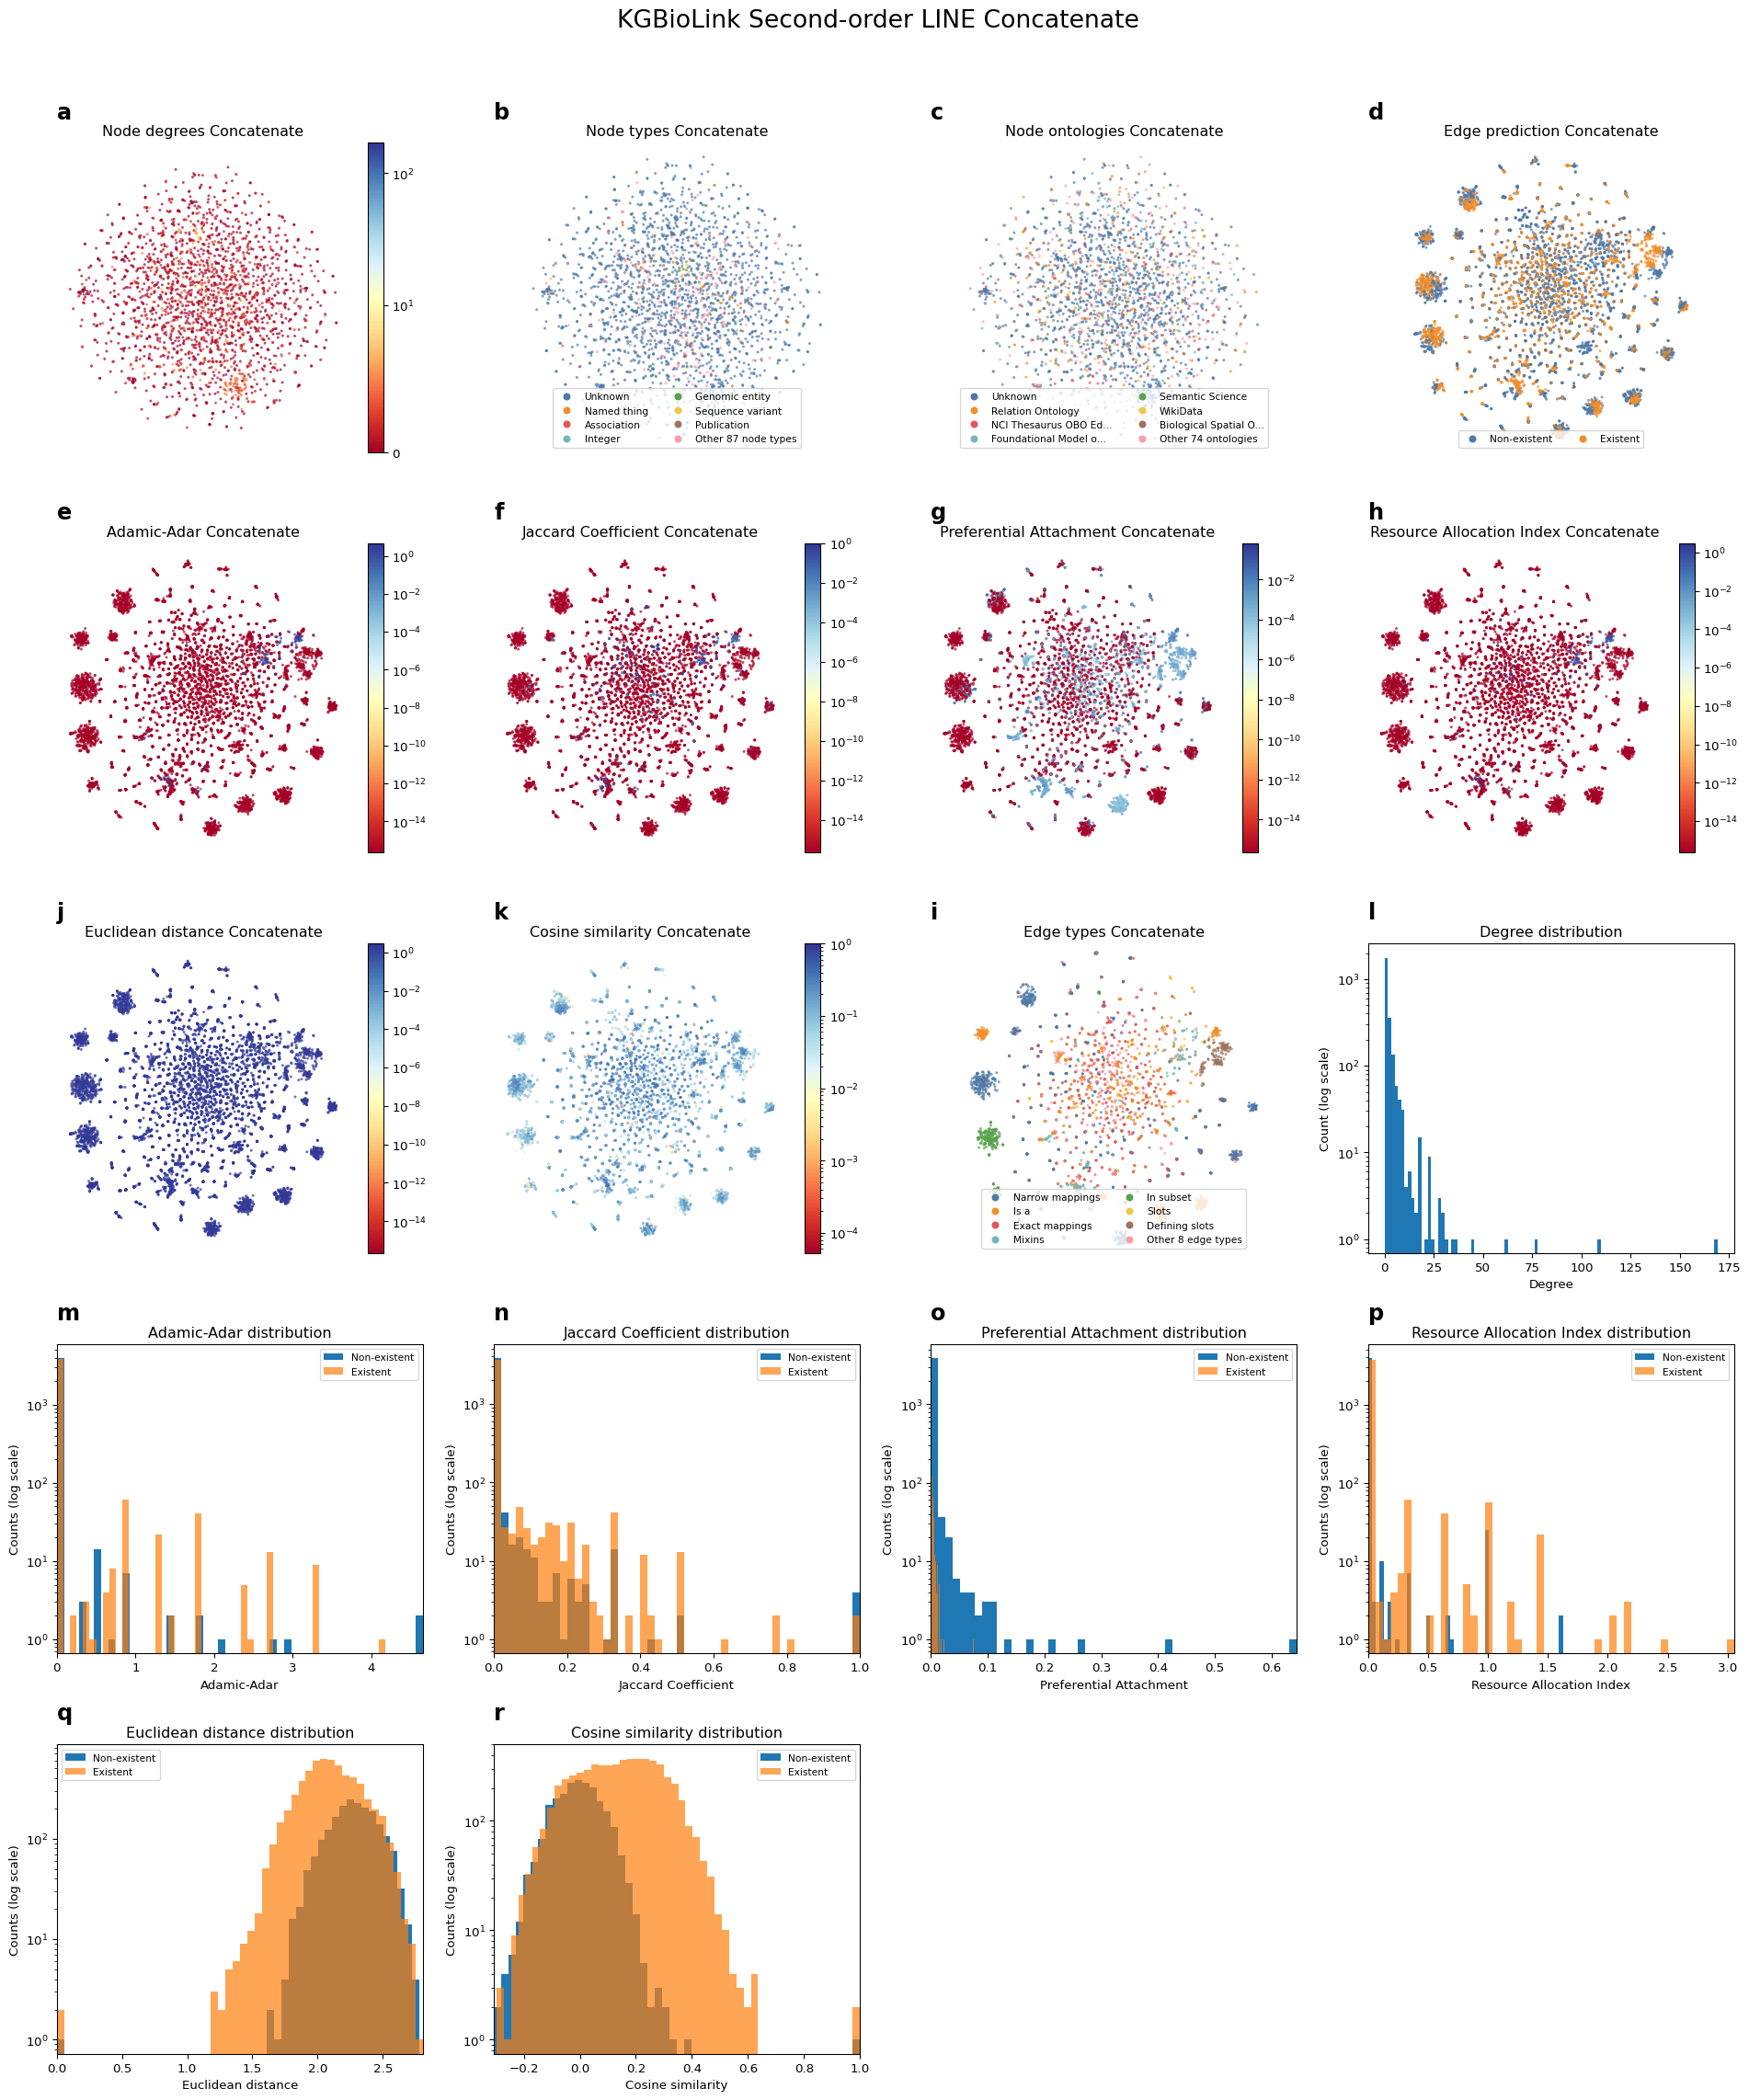

In [19]:
GraphVisualizer(kg).fit_and_plot_all("Second-order LINE")

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


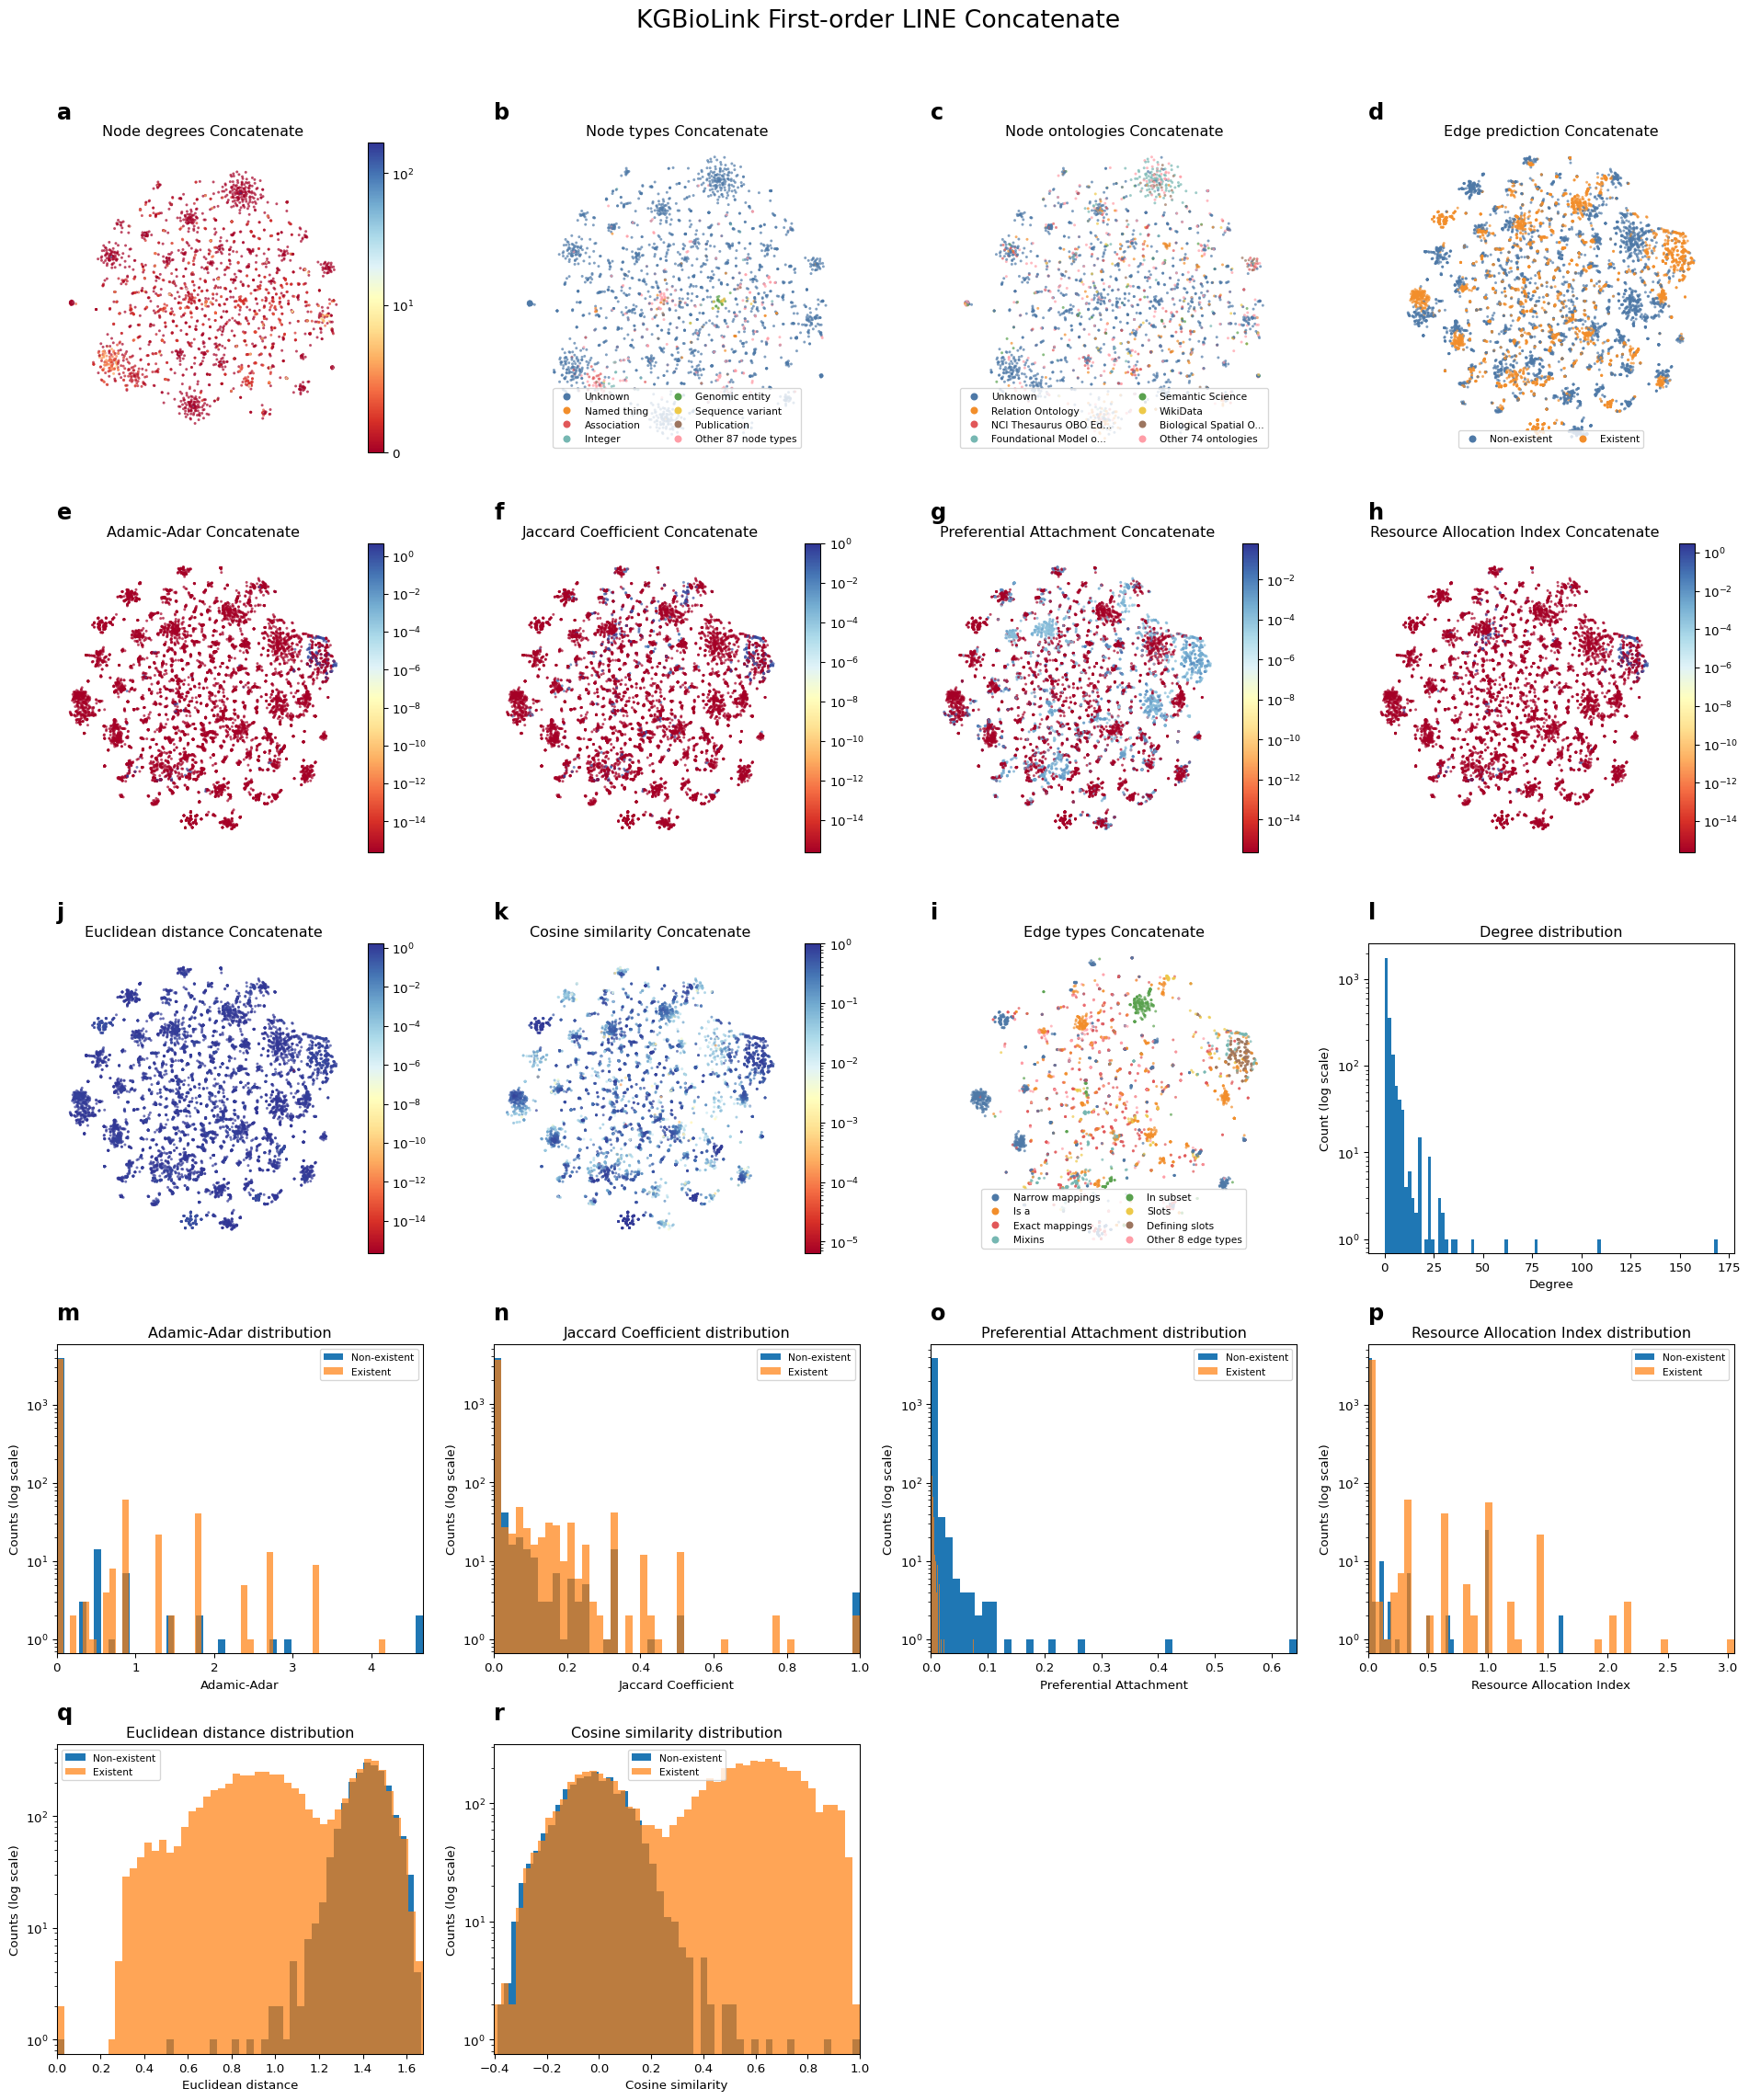

In [28]:
GraphVisualizer(kg).fit_and_plot_all(FirstOrderLINEEnsmallen(
    epochs=1000
))

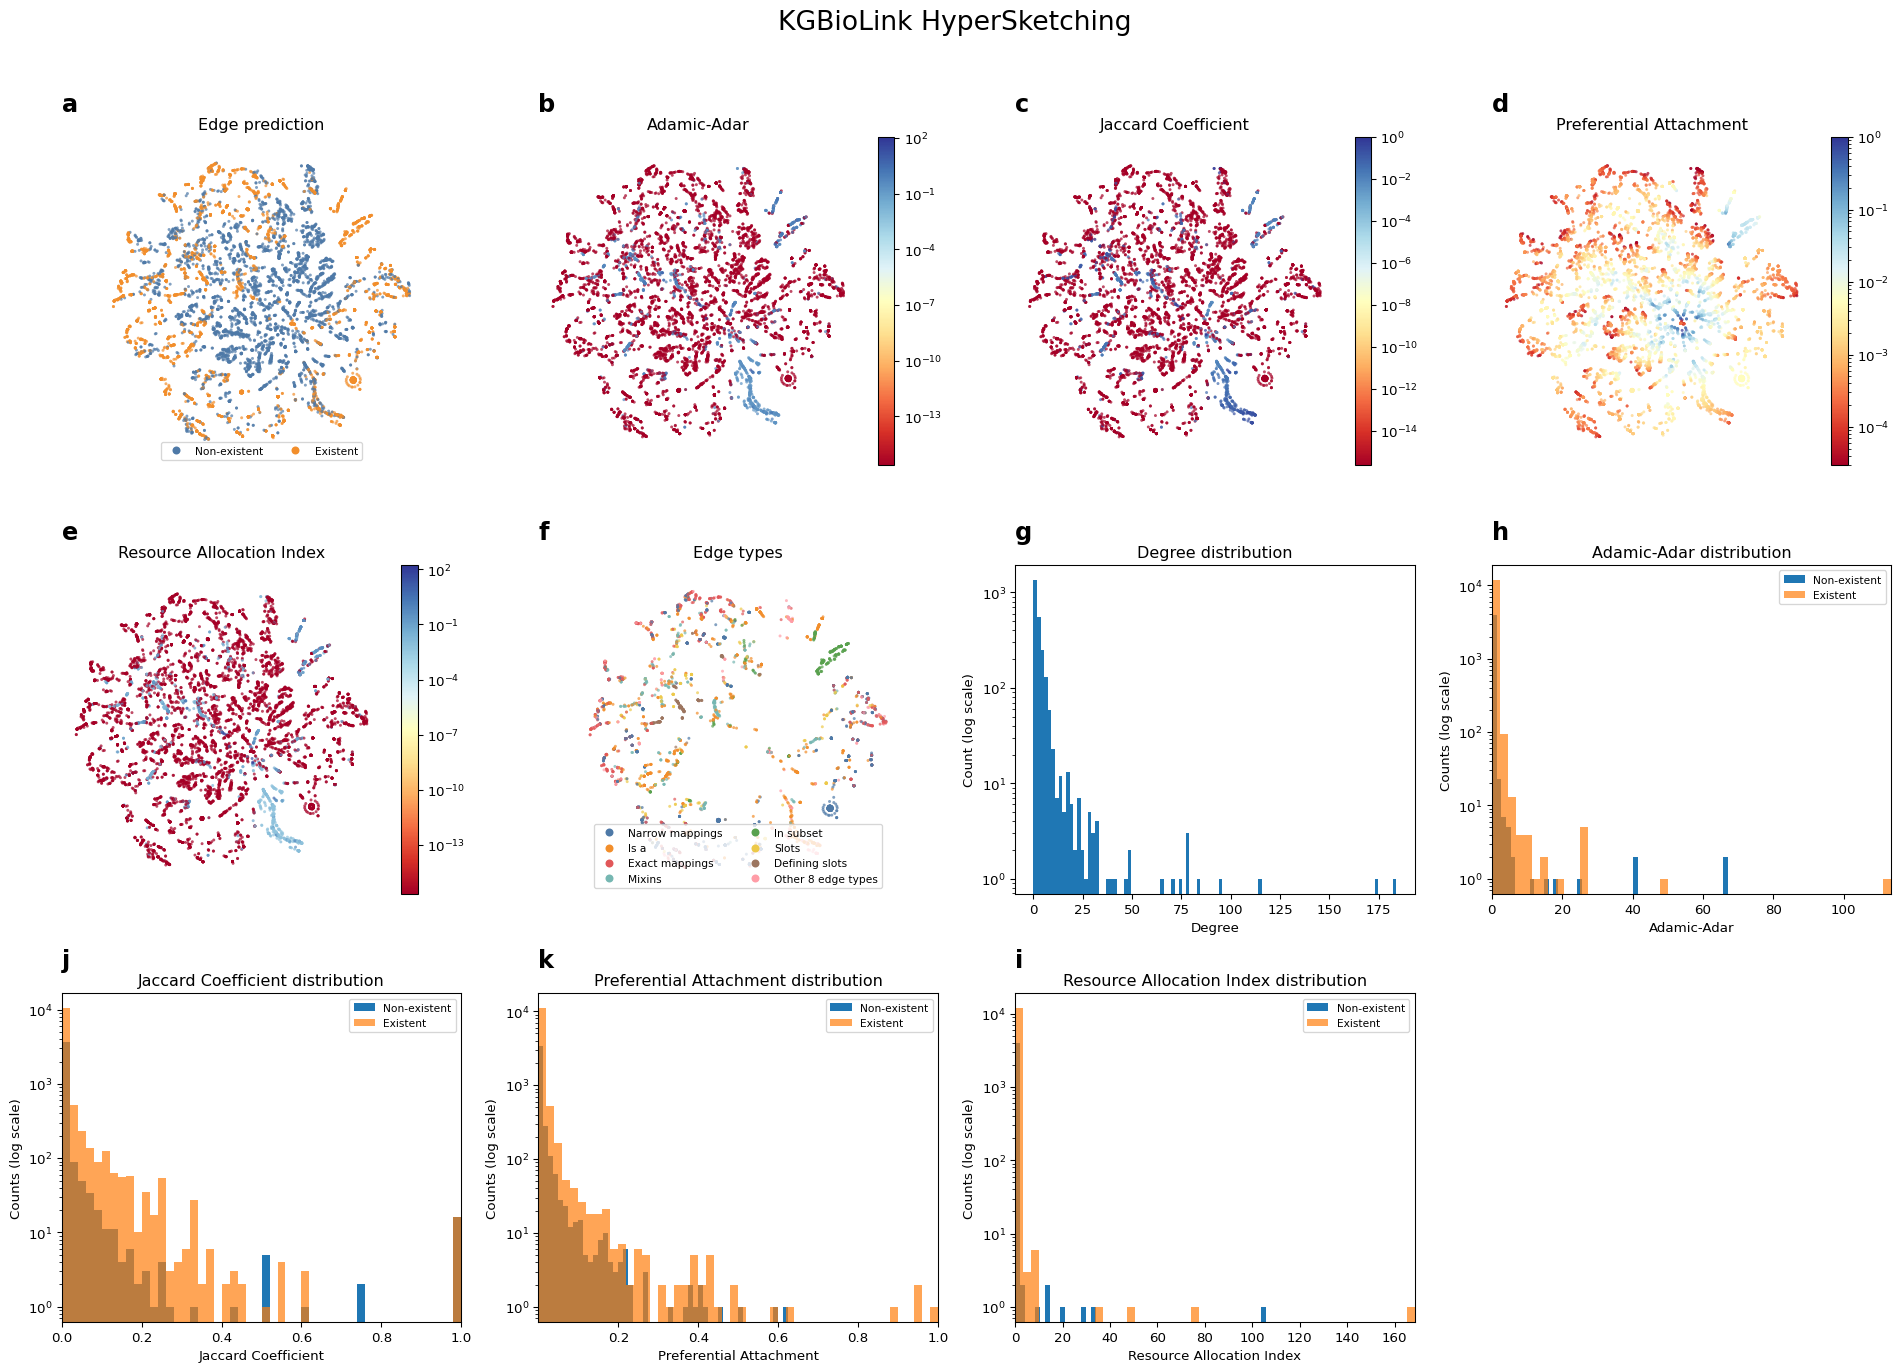

In [4]:
from grape.embedders import HyperSketching

GraphVisualizer(kg).fit_and_plot_all(HyperSketching(number_of_hops=6))

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


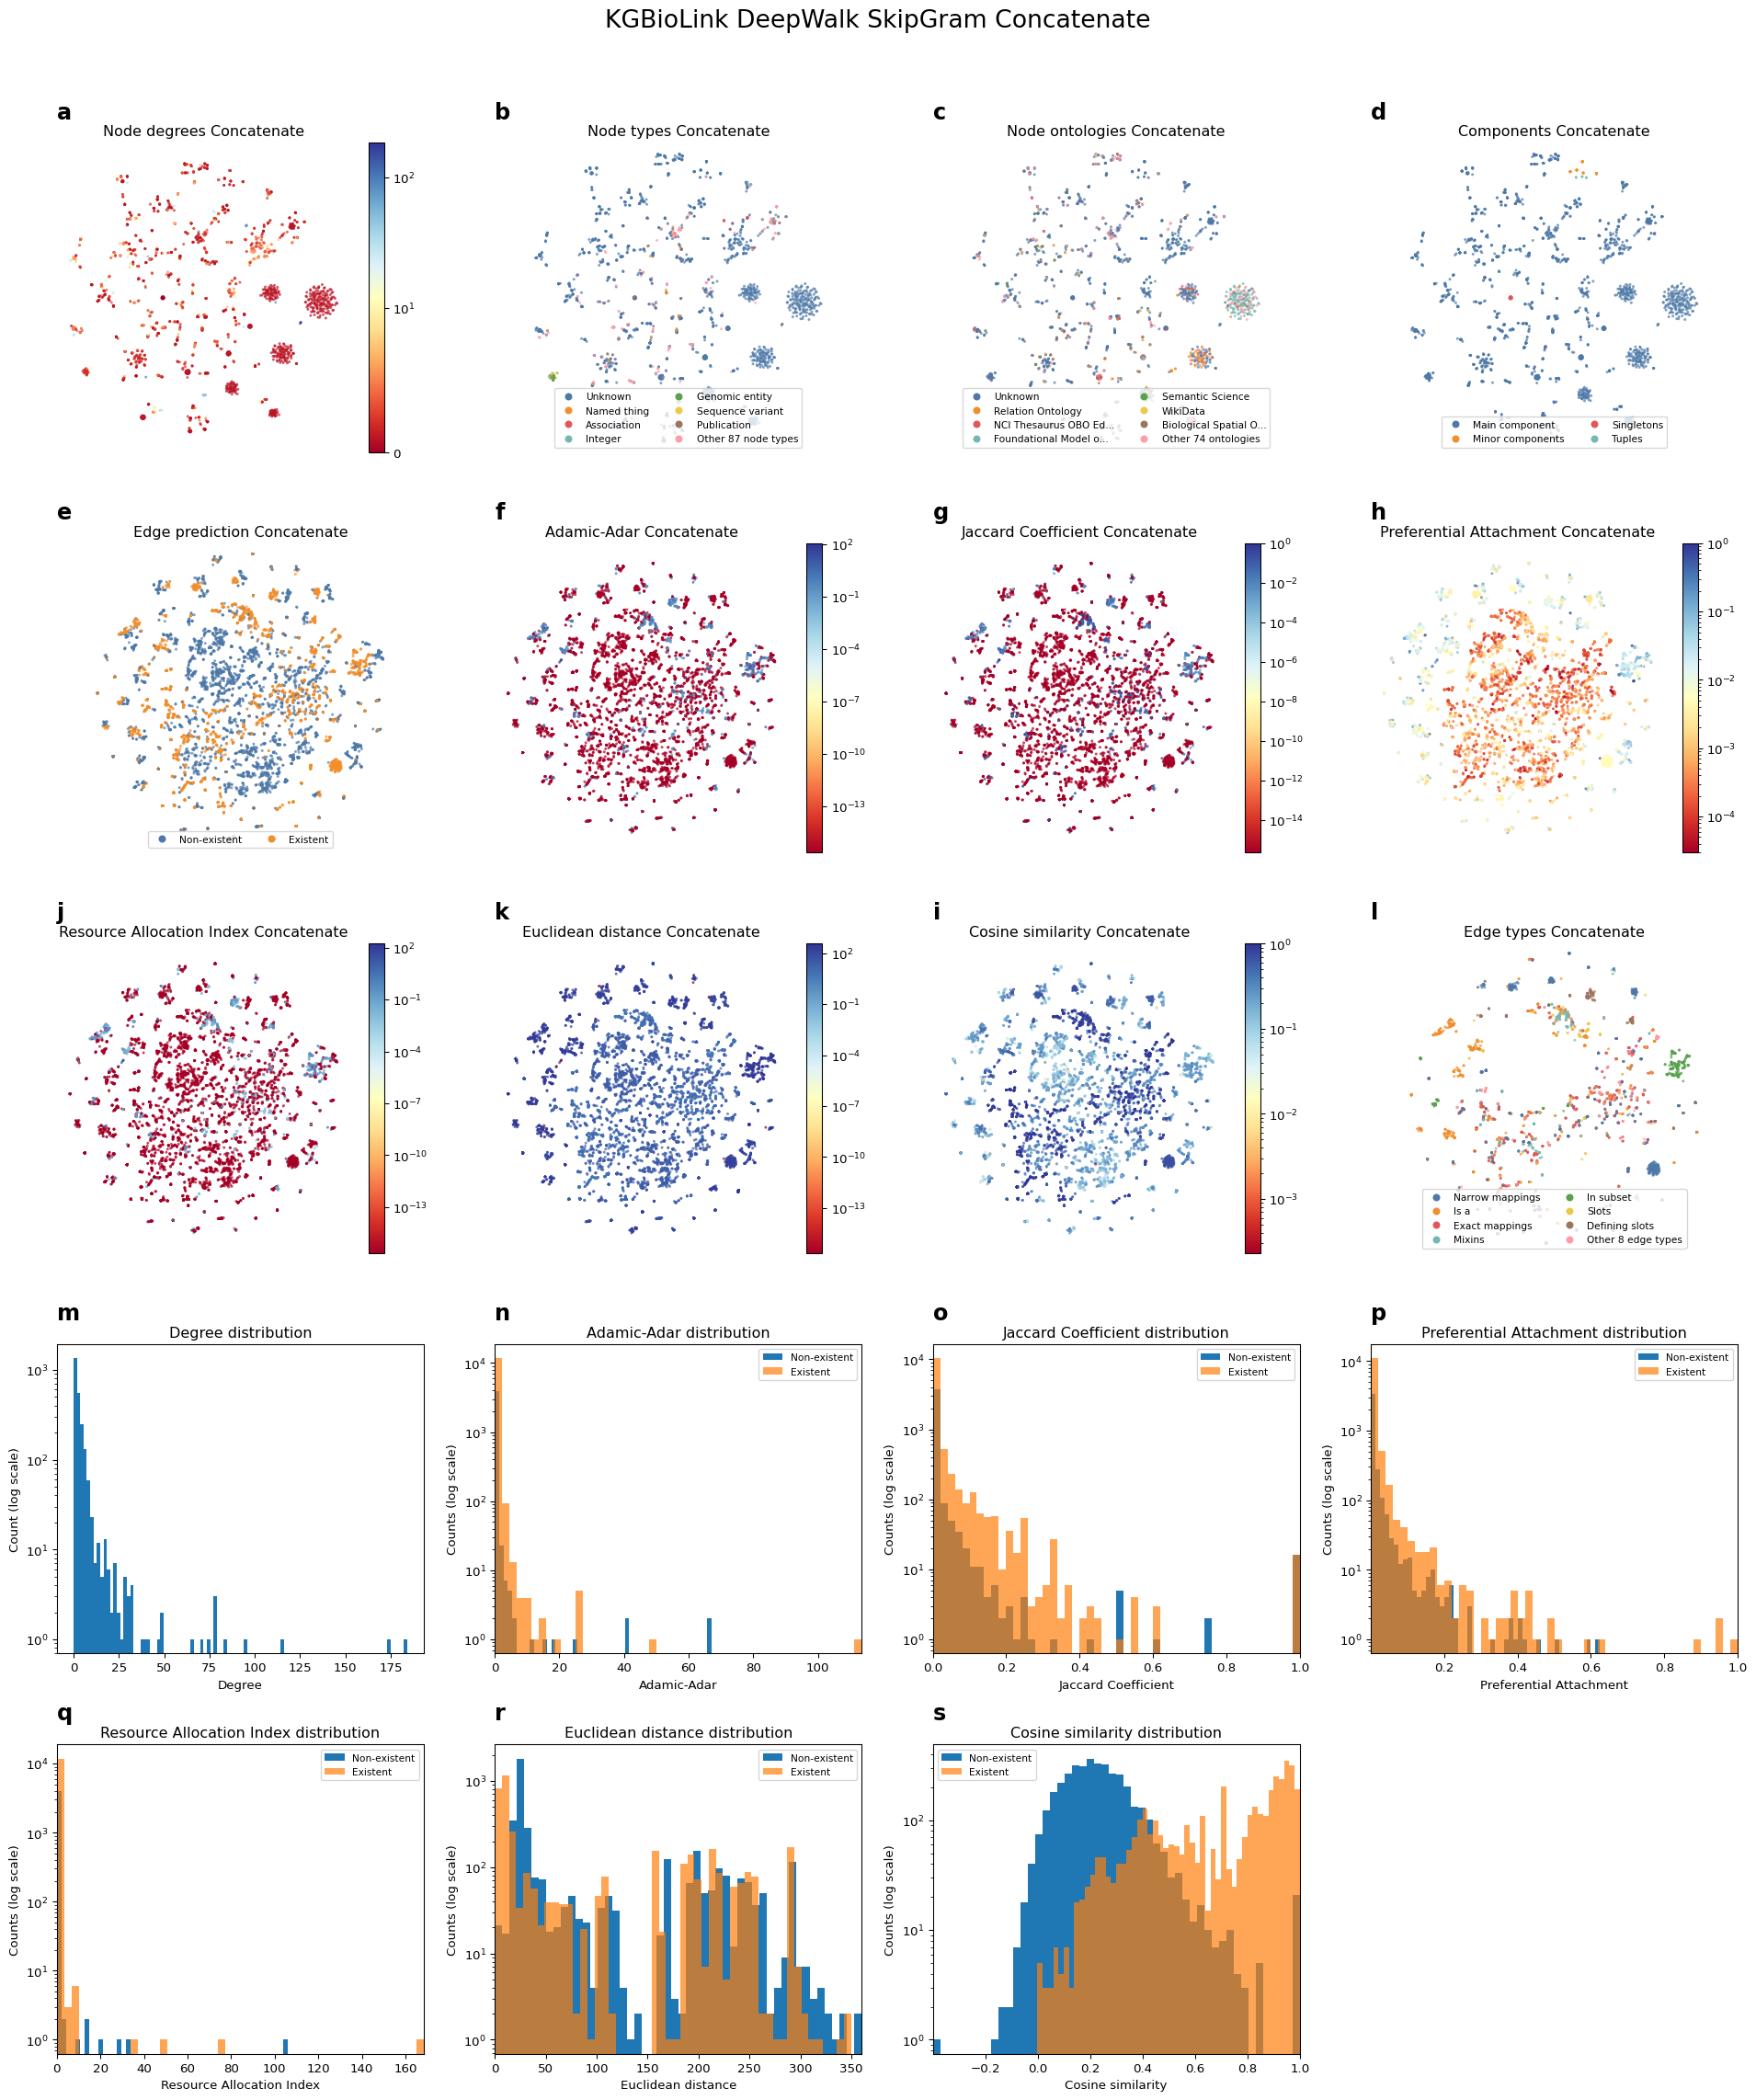

In [5]:
GraphVisualizer(kg).fit_and_plot_all("DeepWalk SkipGram")

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


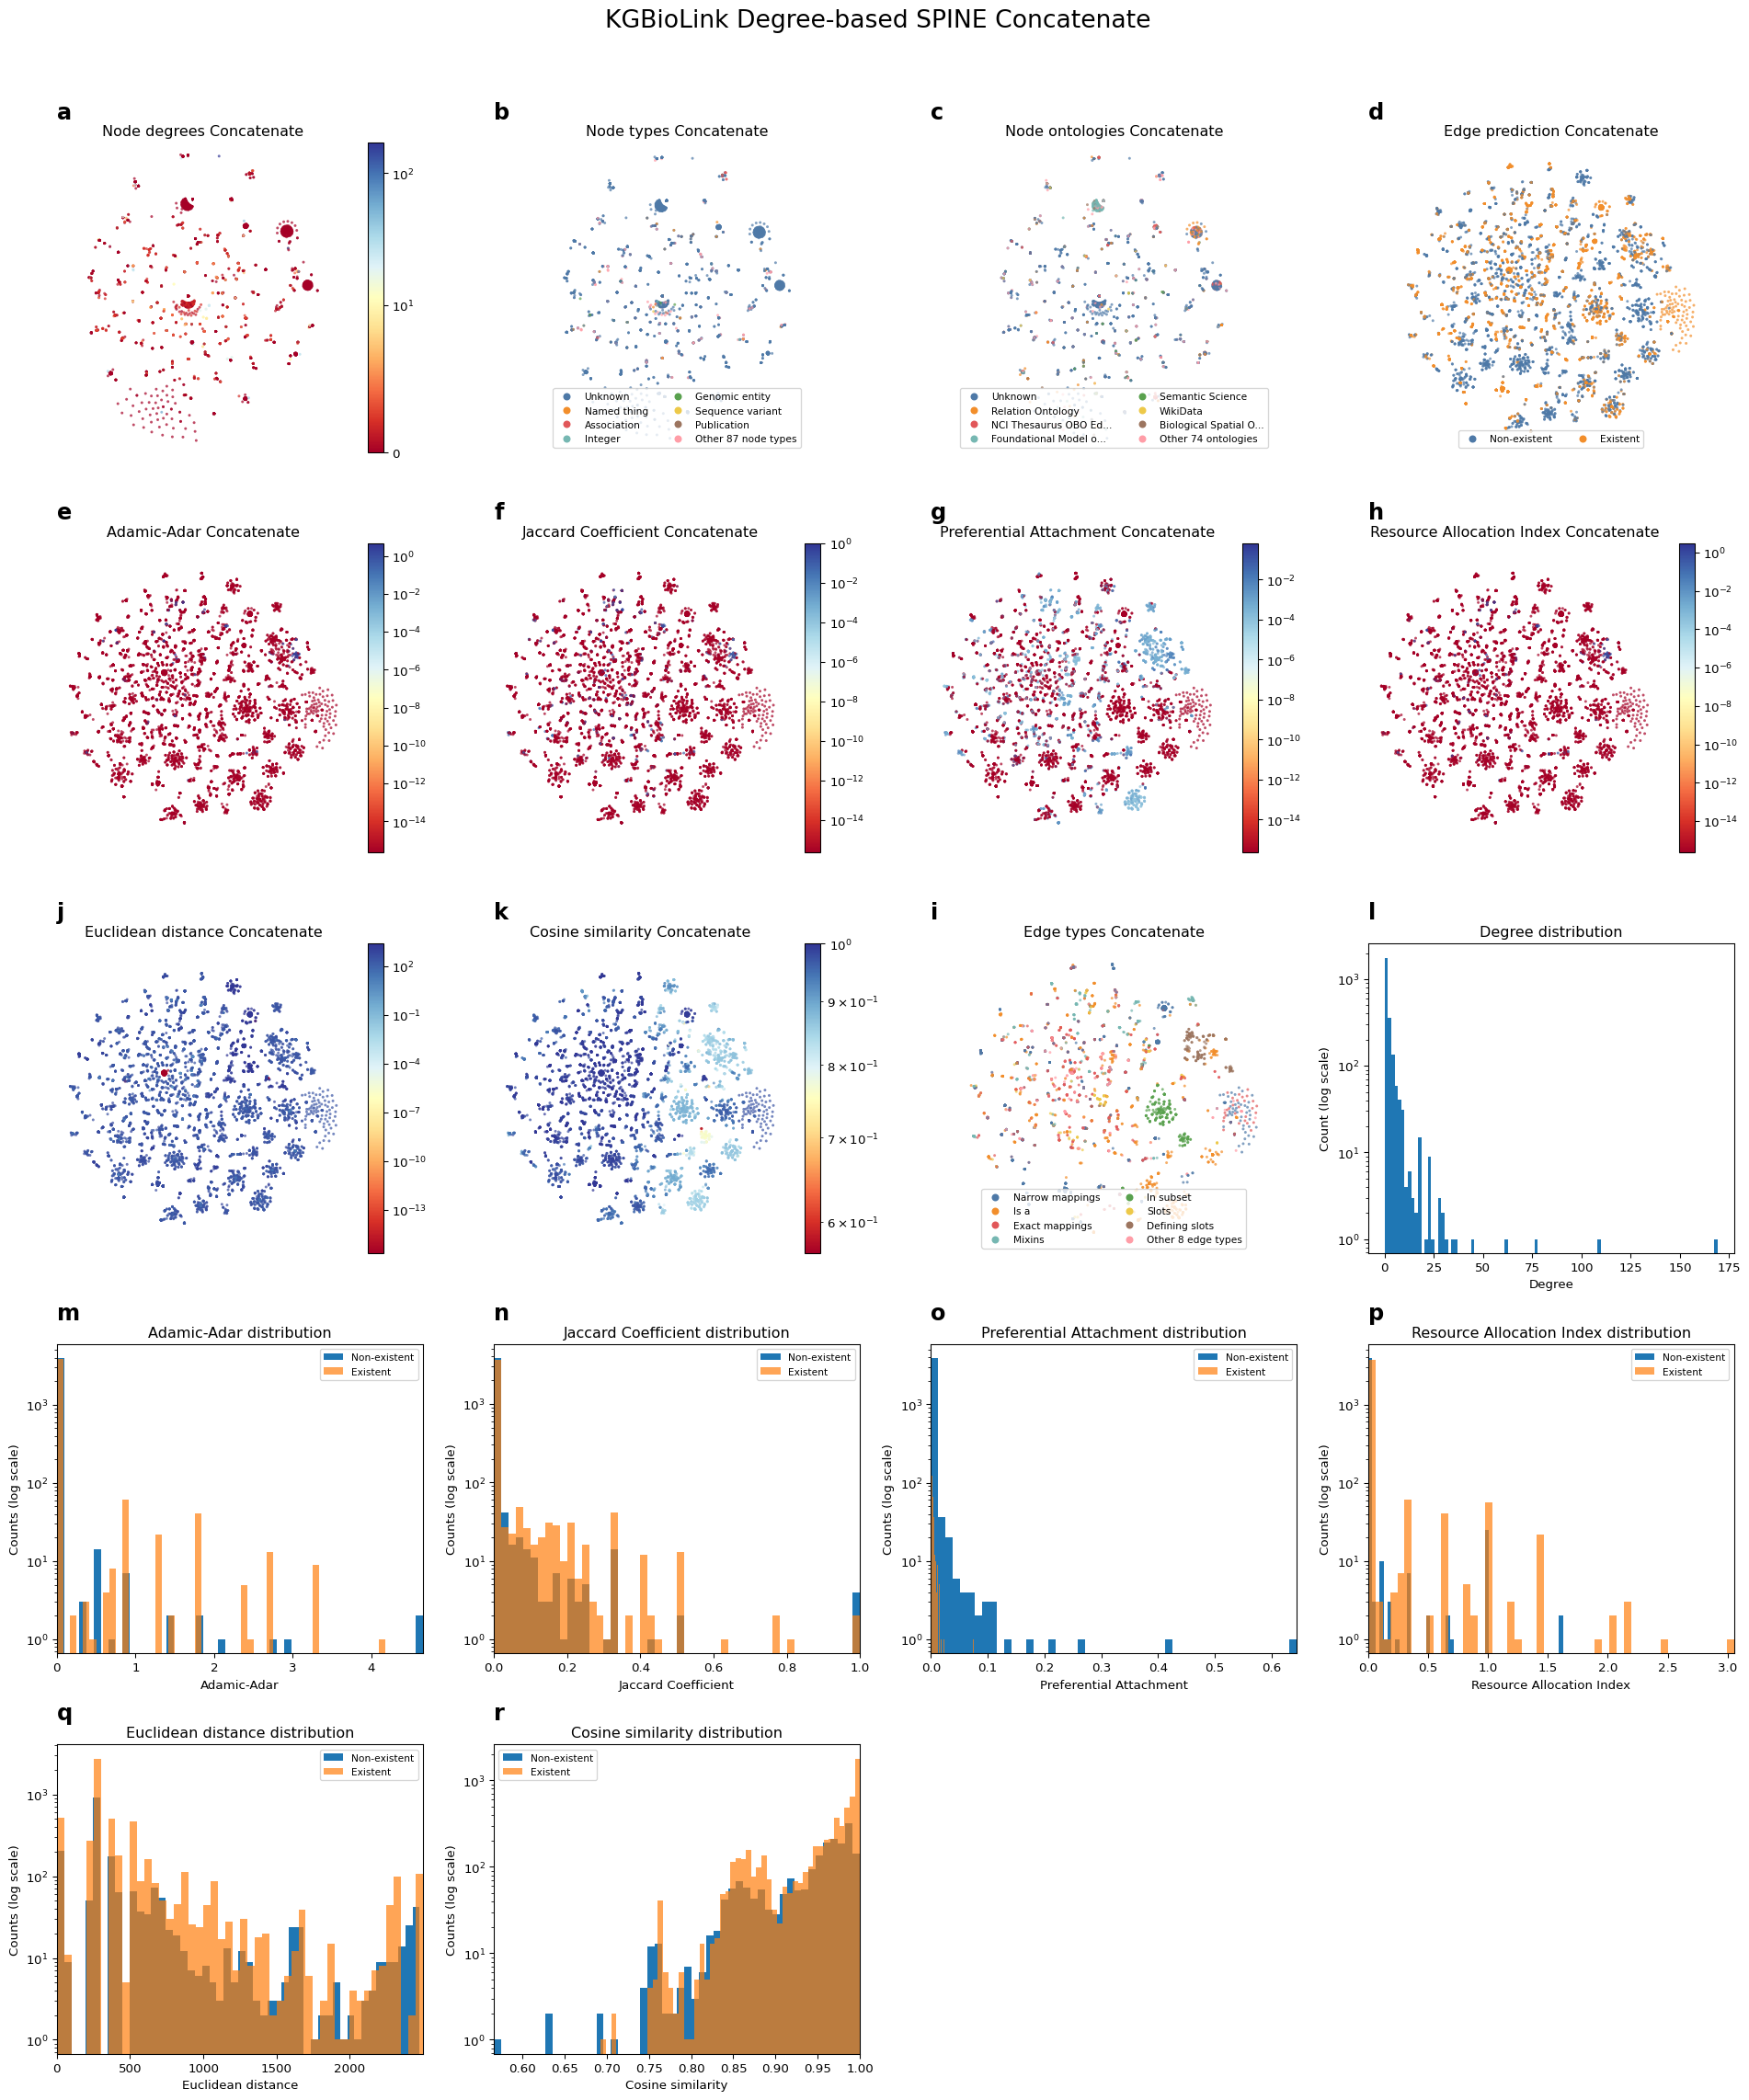

In [21]:
GraphVisualizer(kg).fit_and_plot_all("Degree-based SPINE")

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


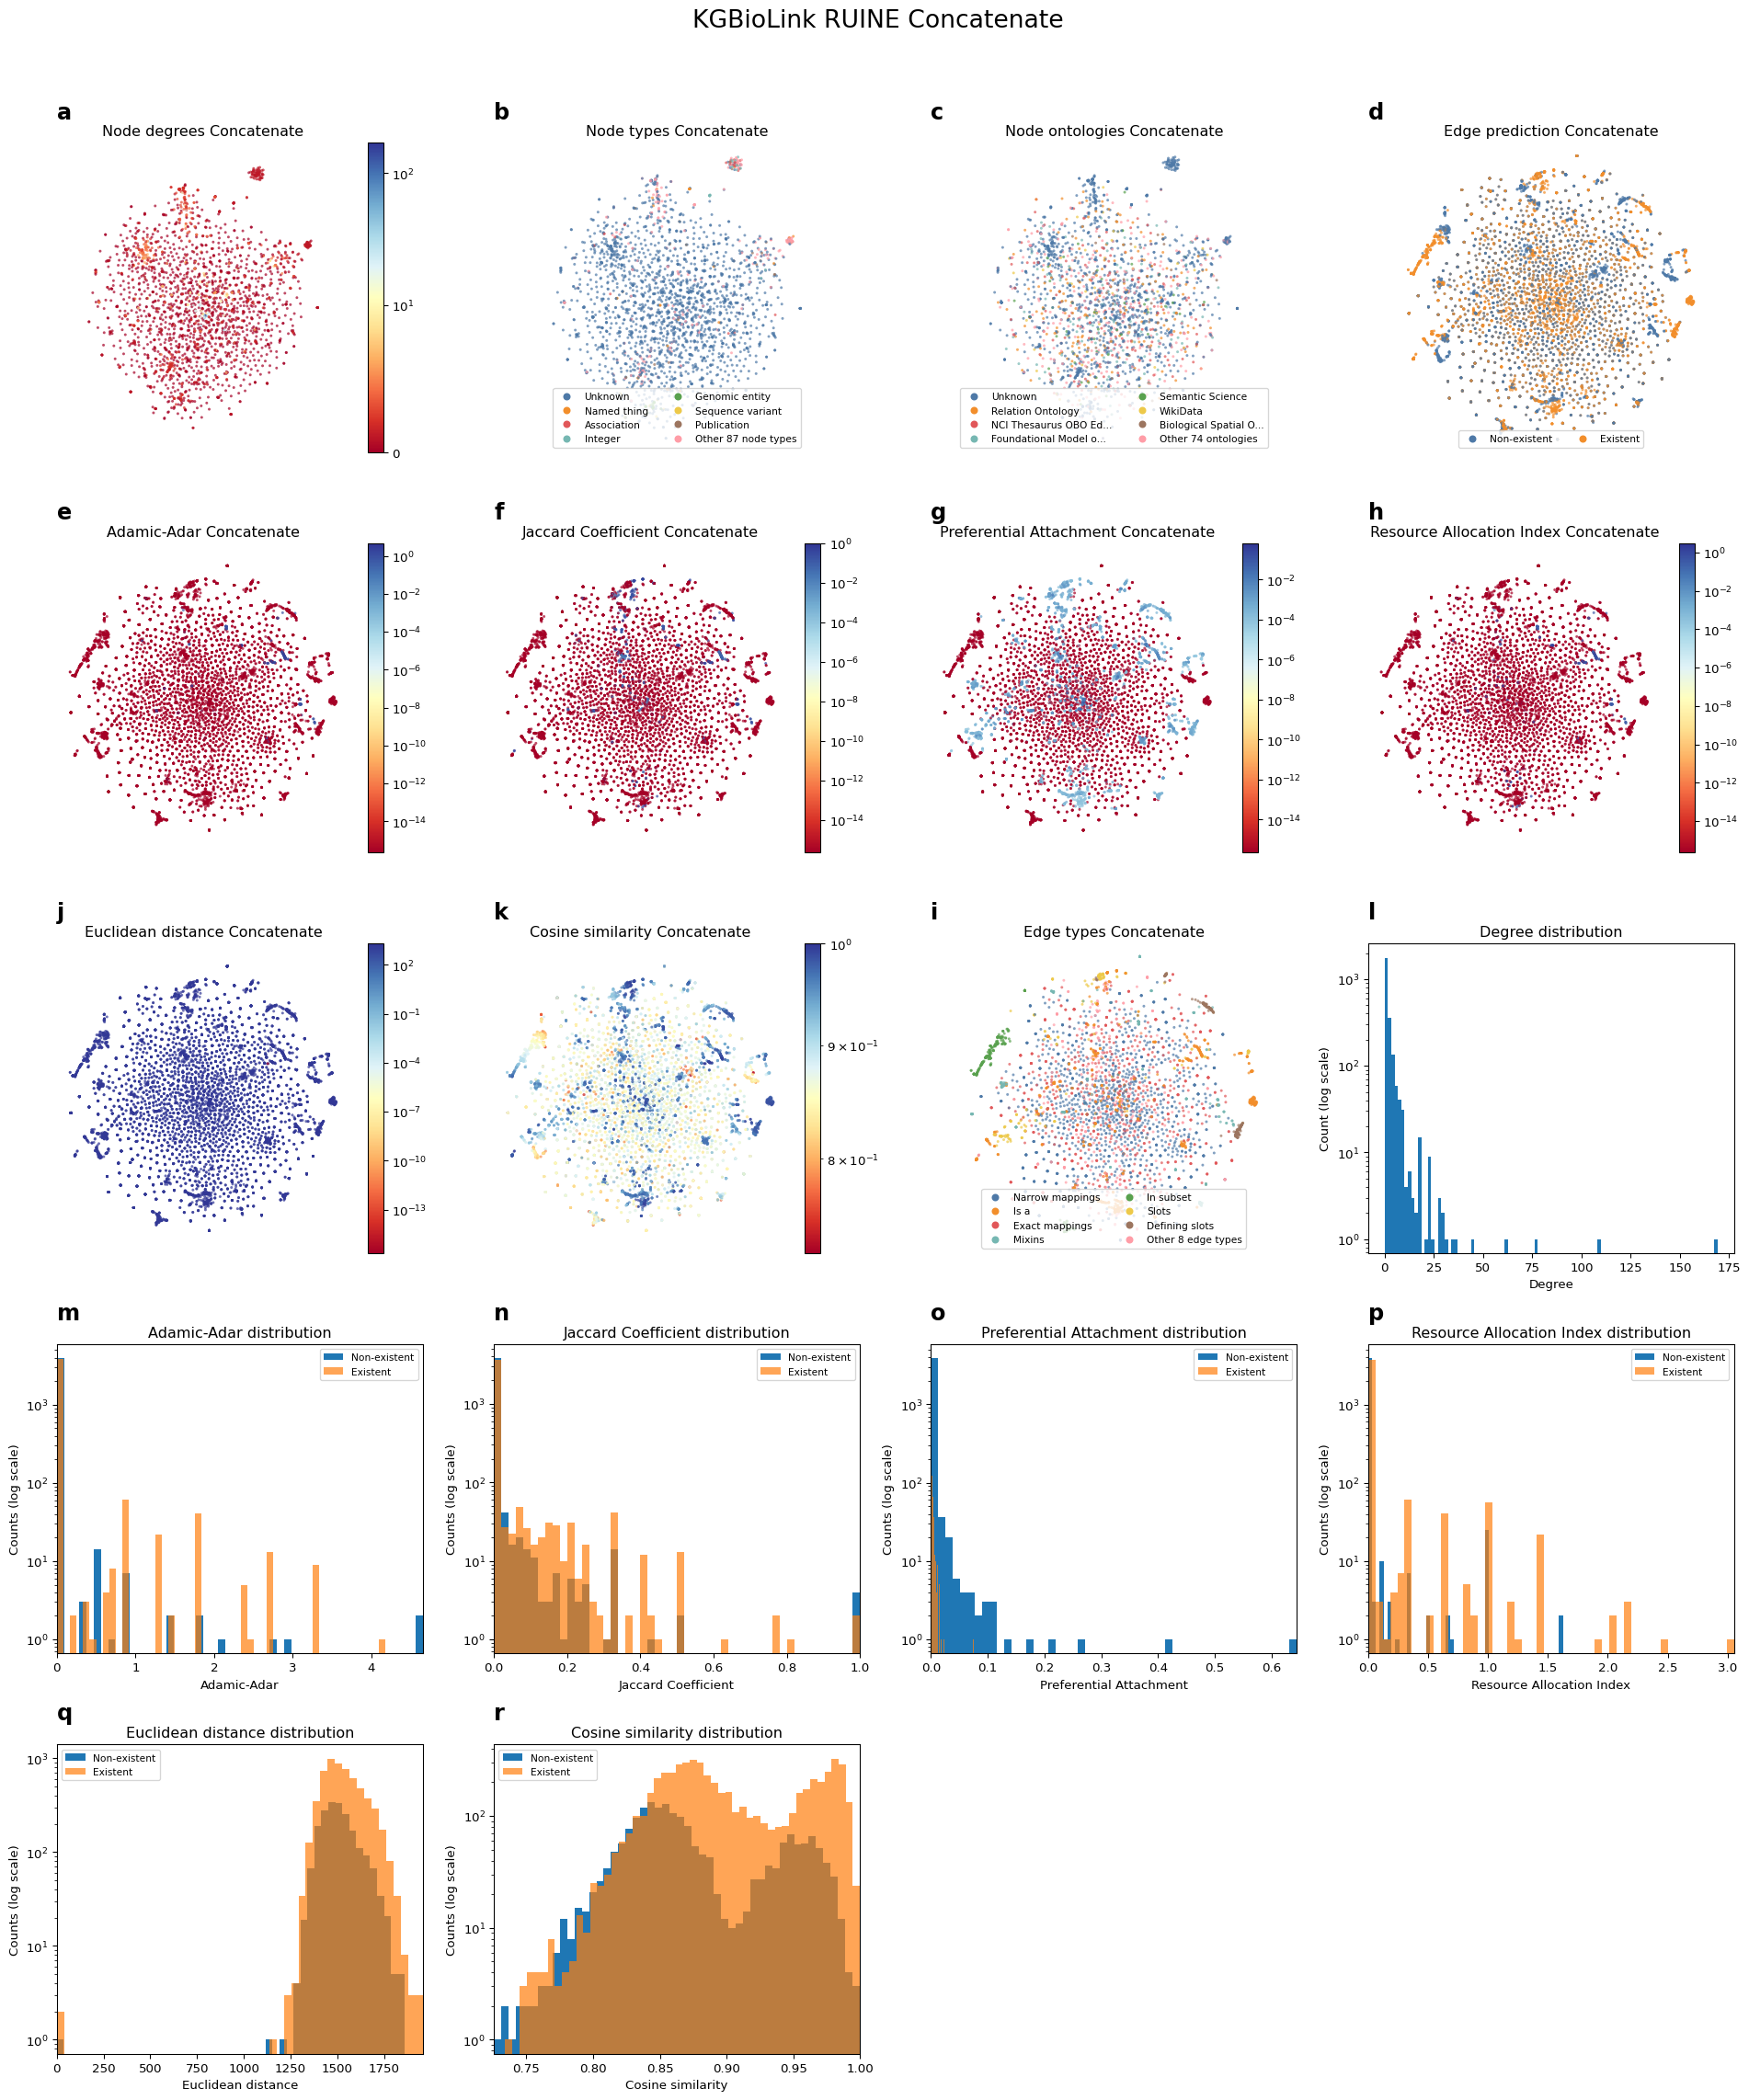

In [22]:
GraphVisualizer(kg).fit_and_plot_all("RUINE")

In [6]:
embedding = DeepWalkSkipGramEnsmallen(
    embedding_size=200,
    epochs=500
).fit_transform(kg.to_undirected())

/home/luca/anaconda3/envs/grape/lib/python3.11/site-packages/embiggen/utils/abstract_models/abstract_embedding_model.py:169: UserWarning: Please be advised that the KGBioLink graph contains 23 disconnected nodes. Consider that node embedding algorithms that only use topological information such as CBOW, GloVe, SPINE and SkipGram are not able to provide meaningful embeddings for these nodes, and their embedding will be generally far away from any other node. It is also possible that all disconnected nodes will receive a relatively similar node embedding. Consider dropping them by using the `graph.remove_disconnected_nodes()` method.
  warnings.warn(


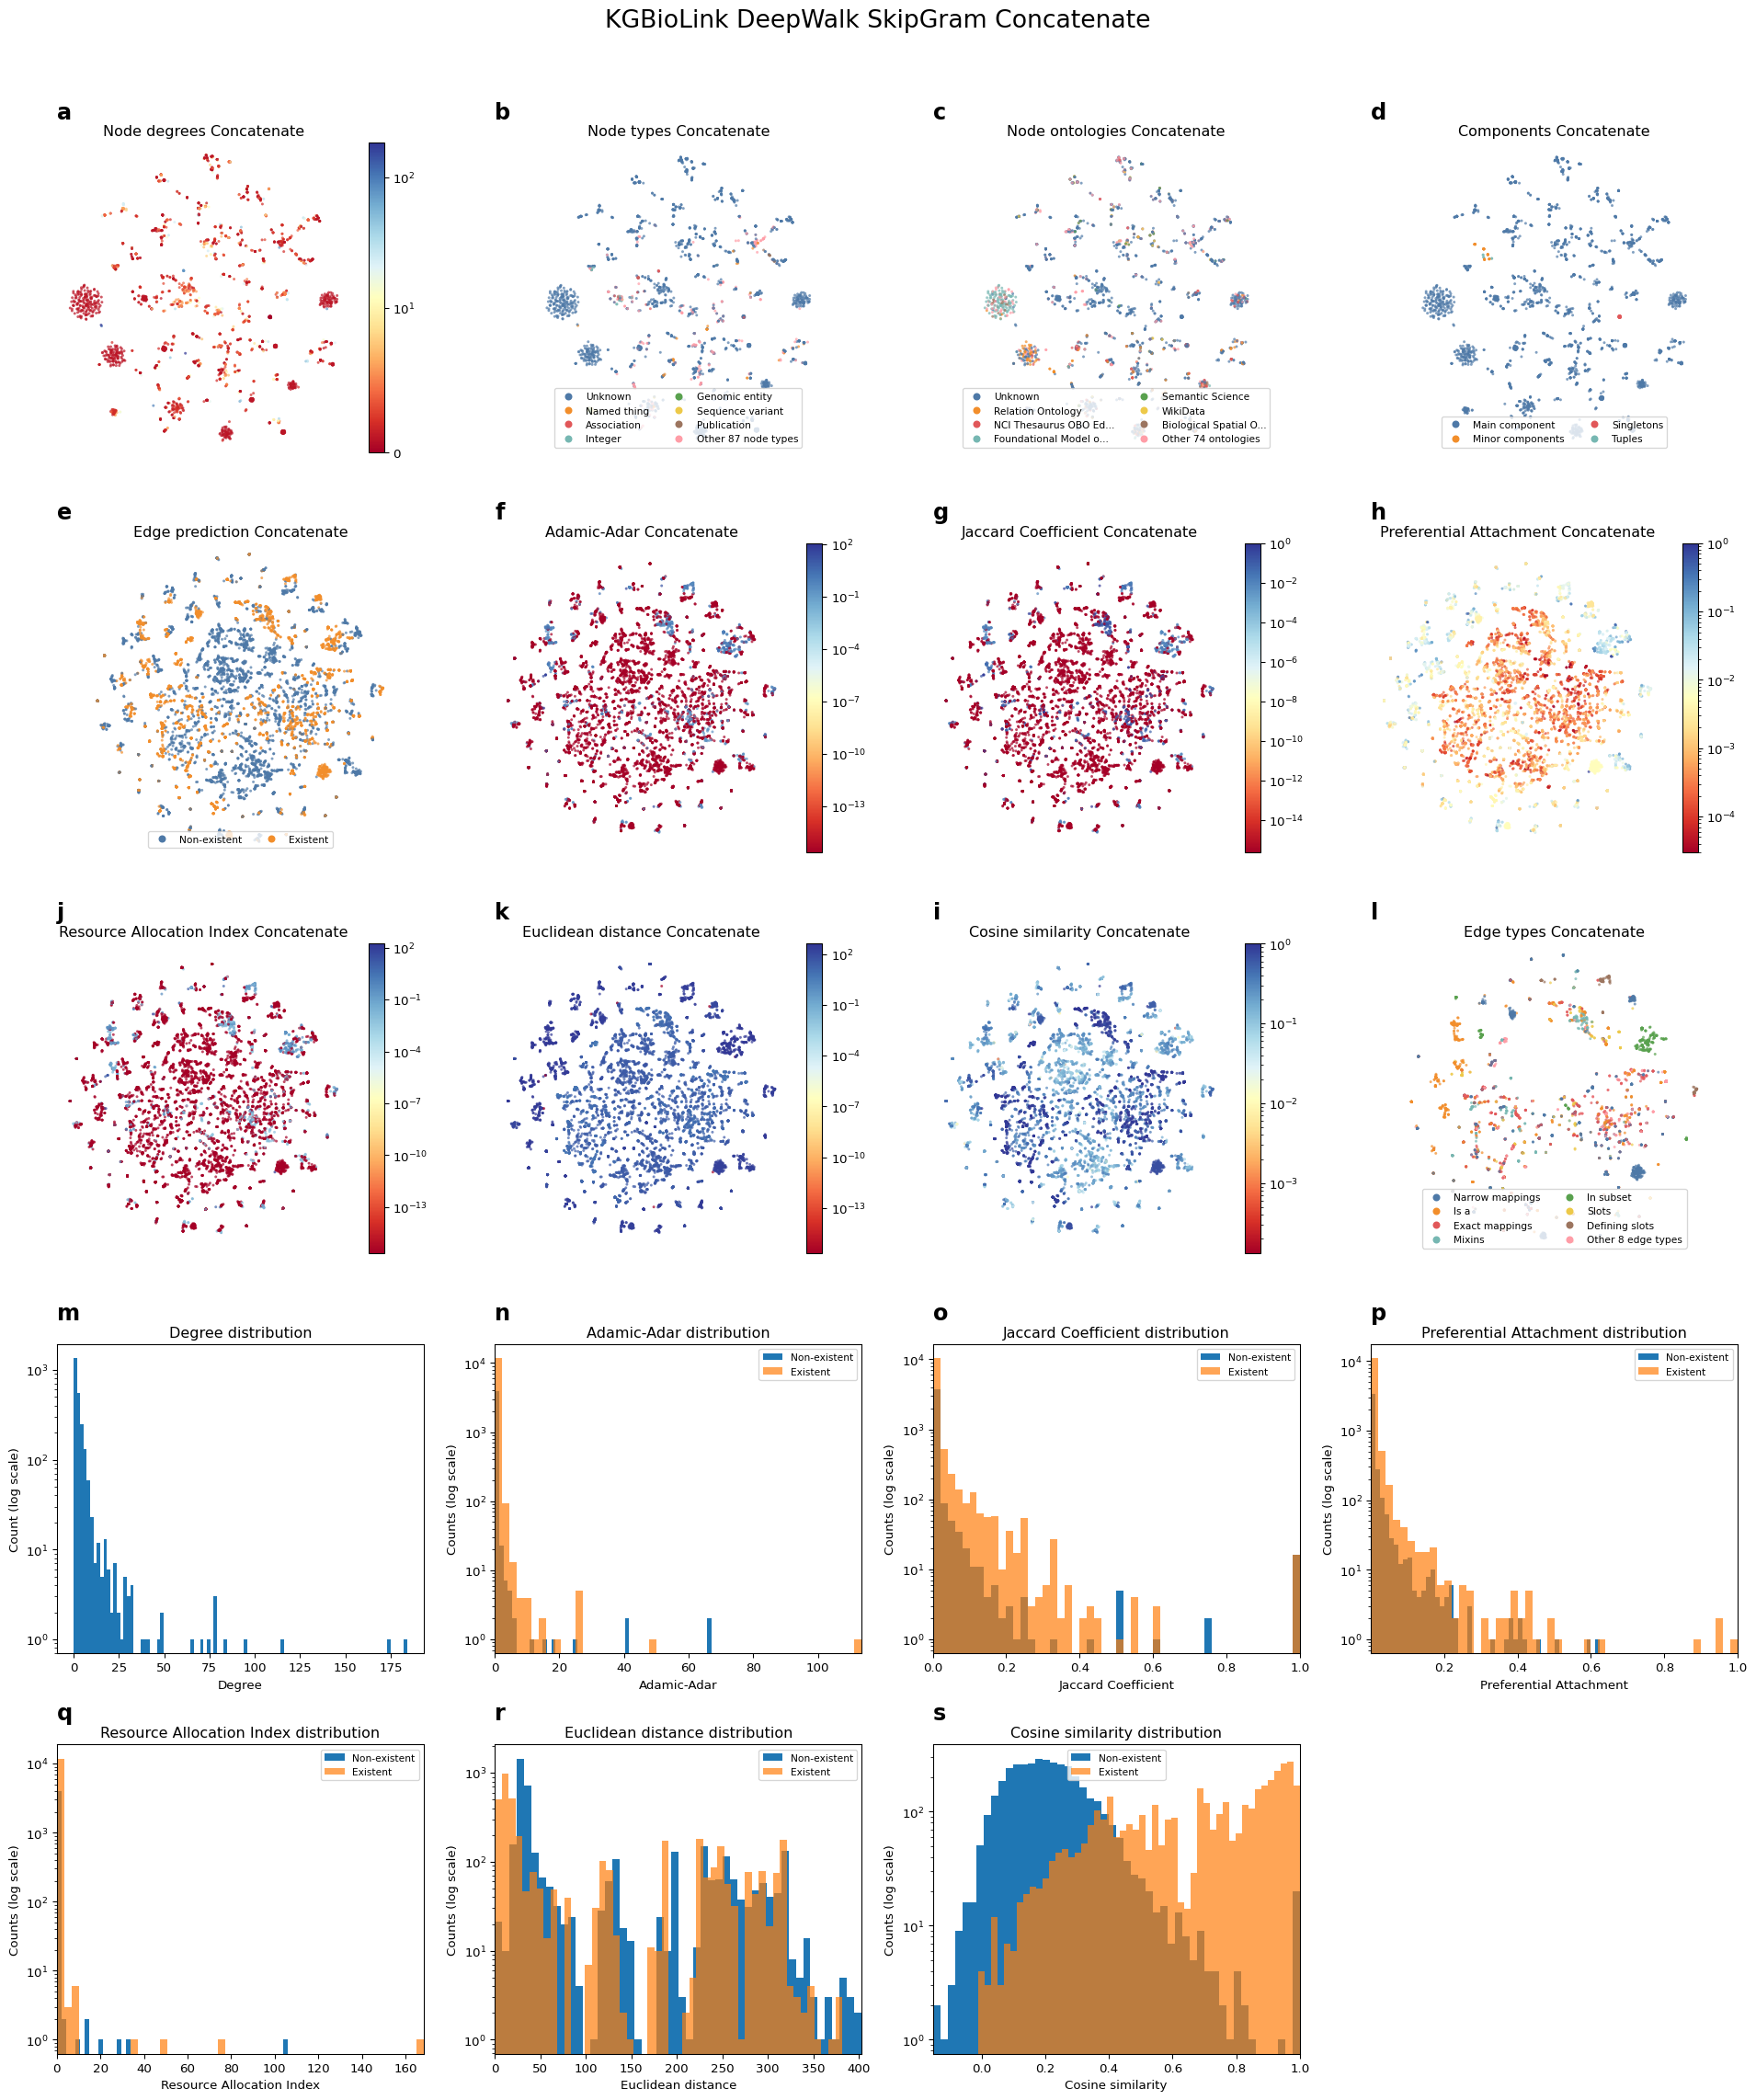

In [7]:
GraphVisualizer(kg.to_undirected()).fit_and_plot_all(embedding)

In [9]:
embedding

In [11]:
center, context = embedding.get_all_node_embedding()

In [12]:
center.to_csv("")

0         1         2         3         4    \
xsd:string              -0.072878 -0.144700 -0.067061  0.131639 -0.052677   
unit                    -0.973575 -1.447606  0.179195 -0.817298  0.101674   
type                     1.891419  0.002167  2.135168 -1.388622  1.630769   
reaction side           -0.571337 -0.608837 -0.808049 -0.905452 -0.304777   
xref                    -0.063378 -0.122220  2.224703 -2.505970 -0.461677   
...                           ...       ...       ...       ...       ...   
FMA:inferolateral_to    -0.438760  0.102523 -1.742201  0.459677  0.017971   
dcid:MedicalProcedure   -0.811376 -1.041067 -0.535961  0.139891  0.012823   
WIKIDATA_PROPERTY:P1433 -1.086332 -0.633953 -2.837571  0.623779  1.491273   
ExO:0000000             -2.431942 -1.618060 -1.664480  1.600427  1.214738   
ZFA:0100000             -0.622557 -1.164770 -2.548522  1.265569 -0.378256   

                              5         6         7         8         9    \
xsd:string              -0.094995  0.066838 -0.077434  0.142008  0.098341   
unit                     2.400164 -1.569891  0.843672 -0.905706 -2.698611   
type                     0.220317  0.689089 -0.080505  0.541331  0.307610   
reaction side            0.896665 -0.586573  0.706863 -1.339273 -2.002982   
xref                    -3.116155  2.513550 -0.976073  0.398109  1.515378   
...                           ...       ...       ...       ...       ...   
FMA:inferolateral_to    -0.317919 -0.113220  0.505657  0.499508 -1.103532   
dcid:MedicalProcedure   -2.028339 -2.065723  0.954170  1.065558 -2.852303   
WIKIDATA_PROPERTY:P1433  0.128719 -2.110000  0.819413  2.343990  0.776359   
ExO:0000000              0.781453 -2.084994  0.421455  0.013861 -0.944599   
ZFA:0100000             -0.865937 -2.635659  1.665726 -0.073985 -2.451162   

                         ...       190       191       192       193  \
xsd:string               ... -0.144748 -0.084269 -0.085610  0.011344   
unit                     ... -0.195326 -0.599890 -1.923281 -0.673467   
type                     ... -2.217630  1.828953 -0.691772 -0.403024   
reaction side            ... -0.280284  0.776588  1.350678  0.458543   
xref                     ...  2.828766 -1.553064 -0.330006  2.362554   
...                      ...       ...       ...       ...       ...   
FMA:inferolateral_to     ...  0.236365  1.593708 -0.617783 -0.507812   
dcid:MedicalProcedure    ...  1.140976  1.273668 -0.095756  0.456737   
WIKIDATA_PROPERTY:P1433  ...  0.291699  0.034311 -1.189517  1.216176   
ExO:0000000              ... -0.344147  0.272347  1.929555  1.594874   
ZFA:0100000              ... -1.290111 -1.858251 -0.969656  2.343852   

                              194       195       196       197       198  \
xsd:string              -0.134762 -0.079018 -0.121916 -0.097176 -0.032293   
unit                     0.957742 -1.003502 -1.453417 -0.000252 -0.628666   
type                     0.888448 -1.183290 -1.396217  2.256447 -1.250528   
reaction side           -0.844508 -0.269987 -0.676672  0.305305 -1.365086   
xref                    -1.730293 -1.180125 -0.811939 -0.894854 -0.194673   
...                           ...       ...       ...       ...       ...   
FMA:inferolateral_to    -1.812354  0.878199 -2.154374 -0.300193 -0.424787   
dcid:MedicalProcedure    1.504445 -1.430735 -1.554397  0.374760 -0.595308   
WIKIDATA_PROPERTY:P1433  0.199200 -0.483797 -0.352902  0.099060 -1.477696   
ExO:0000000              0.949111 -1.215142  0.267419  0.601688 -1.058336   
ZFA:0100000             -0.125054  0.761899 -0.516602 -0.768597  0.021529   

                              199  
xsd:string              -0.070856  
unit                    -2.214666  
type                    -0.894022  
reaction side           -0.438315  
xref                     0.326261  
...                           ...  
FMA:inferolateral_to    -2.059669  
dcid:MedicalProcedure   -2.310985  
WIKIDATA_PROPERTY:P1433 -0.728957  
ExO:0000000             -1.397